In [2]:
import os
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
df001 = pd.read_csv('results/xai_evaluation/fd001.csv')
df002 = pd.read_csv('results/xai_evaluation/fd002.csv')
df003 = pd.read_csv('results/xai_evaluation/fd003.csv')
df004 = pd.read_csv('results/xai_evaluation/fd004.csv')

In [4]:
col_selected = [col for col in df002.columns if col not in ['Unnamed: 0', 'identity', 'separability', 'stability','completness',
       'fidelity', 'sparsity', 'instability','congruence','selectivity']]

In [8]:
df1 = df001.loc[:,col_selected]
df1['data'] = 'FD001'
df2 = df002.loc[:,col_selected]
df2['data'] = 'FD002'
df3 = df003.loc[:,col_selected]
df3['data'] = 'FD003'
df4 = df004.loc[:,col_selected]
df4['data'] = 'FD004'

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,coherence,accumen,Verm_stability,model,time,data
0,0.087656,0.499664,0.973818,idfc,2004.551244,FD001
1,0.013107,0.547059,0.959636,idfc,2031.552200,FD001
2,0.030386,0.655182,0.976000,idfc,2046.068893,FD001
3,0.065262,0.355462,0.995636,idfc,2121.781437,FD001
4,0.089045,0.542017,0.962909,idfc,3258.912067,FD001
5,0.284713,0.613507,0.930640,all,5369.186525,FD001
6,0.476464,0.608834,0.880660,all,3300.799304,FD001
7,0.249166,0.528625,0.941860,all,3179.089662,FD001
8,0.156097,0.430426,0.954100,all,3490.703868,FD001
9,0.202932,0.502390,0.931660,all,3984.416026,FD001


In [16]:
pip install ace_tools_open

In [18]:
import ace_tools_open as tools

In [21]:
# Regrouper par 'data' et 'model', puis calculer moyenne et écart-type
grouped_by_model = df.groupby(['data', 'model']).agg(['mean', 'std'])

# Reformater comme précédemment : concaténer moyenne et écart-type
formatted_by_model = grouped_by_model.copy()
for col in grouped_by_model.columns.levels[0]:
    mean_col = (col, 'mean')
    std_col = (col, 'std')
    formatted_by_model[col] = (
        grouped_by_model[mean_col].round(3).astype(str) +
        ' (' + grouped_by_model[std_col].round(3).astype(str) + ')'
    )

# Ne conserver que les colonnes formatées
formatted_by_model = formatted_by_model[[col for col in grouped_by_model.columns.levels[0] if col in formatted_by_model.columns]]

# Aplatir les colonnes
formatted_by_model.columns.name = None

tools.display_dataframe_to_user(name="Tableau Moyenne (Écart-type) par Modèle", dataframe=formatted_by_model)

formatted_by_model

Tableau Moyenne (Écart-type) par Modèle


Loading ITables v2.4.4 from the internet... (need help?)


coherence                             accumen  \
                         mean               std              mean   
data  model                                                         
FD001 all     0.274 (895.228)   0.274 (895.228)   0.537 (895.228)   
      idfc    0.057 (541.949)   0.057 (541.949)    0.52 (541.949)   
FD002 all     0.181 (182.233)   0.181 (182.233)   0.515 (182.233)   
      idfc     0.081 (22.795)    0.081 (22.795)    0.531 (22.795)   
FD003 all      0.238 (74.733)    0.238 (74.733)    0.464 (74.733)   
      idfc     0.234 (10.673)    0.234 (10.673)    0.397 (10.673)   
FD004 all     0.156 (231.027)   0.156 (231.027)   0.623 (231.027)   
      idfc   0.123 (1739.838)  0.123 (1739.838)  0.758 (1739.838)   

                                 Verm_stability                    \
                          std              mean               std   
data  model                                                         
FD001 all     0.537 (895.228)   0.928 (895.228)   0.928 (895.228)   
      idfc     0.52 (541.949)   0.974 (541.949)   0.974 (541.949)   
FD002 all     0.515 (182.233)   0.862 (182.233)   0.862 (182.233)   
      idfc     0.531 (22.795)    0.894 (22.795)    0.894 (22.795)   
FD003 all      0.464 (74.733)     0.87 (74.733)     0.87 (74.733)   
      idfc     0.397 (10.673)    0.927 (10.673)    0.927 (10.673)   
FD004 all     0.623 (231.027)   0.795 (231.027)   0.795 (231.027)   
      idfc   0.758 (1739.838)  0.776 (1739.838)  0.776 (1739.838)   

                            time                       
                            mean                  std  
data  model                                            
FD001 all     3864.839 (895.228)   3864.839 (895.228)  
      idfc    2292.573 (541.949)   2292.573 (541.949)  
FD002 all     2096.669 (182.233)   2096.669 (182.233)  
      idfc     1174.719 (22.795)    1174.719 (22.795)  
FD003 all      2097.001 (74.733)    2097.001 (74.733)  
      idfc     1288.795 (10.673)    1288.795 (10.673)  
FD004 all     2981.137 (231.027)   2981.137 (231.027)  
      idfc   2388.418 (1739.838)  2388.418 (1739.838)

In [22]:
# Supprimer les colonnes 'std' du tableau formaté
filtered_df = formatted_by_model.loc[:, formatted_by_model.columns.get_level_values(1) == 'mean']
filtered_df.columns = [col[0] for col in filtered_df.columns]  # Simplifier les noms de colonnes

tools.display_dataframe_to_user(name="Tableau Moyenne (Écart-type) sans colonne std", dataframe=filtered_df)

filtered_df

Tableau Moyenne (Écart-type) sans colonne std


Loading ITables v2.4.4 from the internet... (need help?)


coherence           accumen    Verm_stability  \
data  model                                                         
FD001 all     0.274 (895.228)   0.537 (895.228)   0.928 (895.228)   
      idfc    0.057 (541.949)    0.52 (541.949)   0.974 (541.949)   
FD002 all     0.181 (182.233)   0.515 (182.233)   0.862 (182.233)   
      idfc     0.081 (22.795)    0.531 (22.795)    0.894 (22.795)   
FD003 all      0.238 (74.733)    0.464 (74.733)     0.87 (74.733)   
      idfc     0.234 (10.673)    0.397 (10.673)    0.927 (10.673)   
FD004 all     0.156 (231.027)   0.623 (231.027)   0.795 (231.027)   
      idfc   0.123 (1739.838)  0.758 (1739.838)  0.776 (1739.838)   

                            time  
data  model                       
FD001 all     3864.839 (895.228)  
      idfc    2292.573 (541.949)  
FD002 all     2096.669 (182.233)  
      idfc     1174.719 (22.795)  
FD003 all      2097.001 (74.733)  
      idfc     1288.795 (10.673)  
FD004 all     2981.137 (231.027)  
      idfc   2388.418 (1739.838)

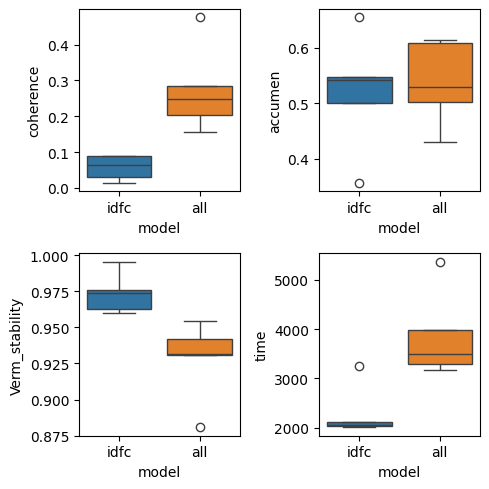

In [36]:
plt.figure(figsize=(5, 5))
kk=0
for col in df002.columns:
    if col not in ['Unnamed: 0', 'identity', 'separability', 'stability','completness',
       'fidelity', 'sparsity', 'instability', 'model','congruence','selectivity']:
        kk = kk+1
        plt.subplot(2, 2, kk)
        sns.boxplot(data=df001, x="model", y=col, hue='model')
        plt.tight_layout()

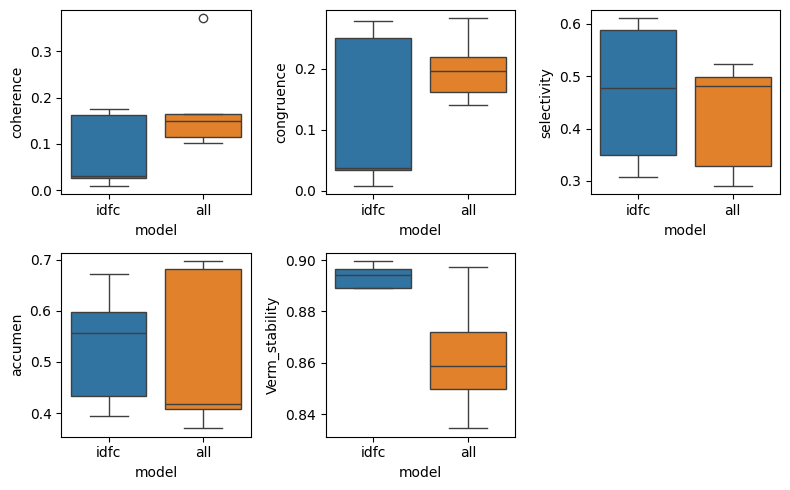

In [30]:
plt.figure(figsize=(8, 5))
kk=0
for col in df002.columns:
    if col not in ['Unnamed: 0', 'identity', 'separability', 'stability','completness',
       'fidelity', 'sparsity', 'instability', 'model', 'time']:
        kk = kk+1
        plt.subplot(2, 3, kk)
        sns.boxplot(data=df002, x="model", y=col, hue='model')
        plt.tight_layout()

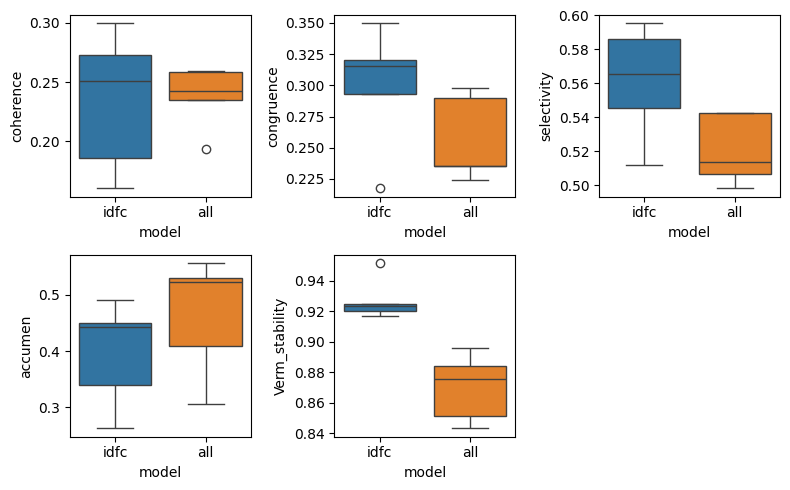

In [29]:
plt.figure(figsize=(8, 5))
kk=0
for col in df002.columns:
    if col not in ['Unnamed: 0', 'identity', 'separability', 'stability','completness',
       'fidelity', 'sparsity', 'instability', 'model', 'time']:
        kk = kk+1
        plt.subplot(2, 3, kk)
        sns.boxplot(data=df003, x="model", y=col, hue='model')
        plt.tight_layout()

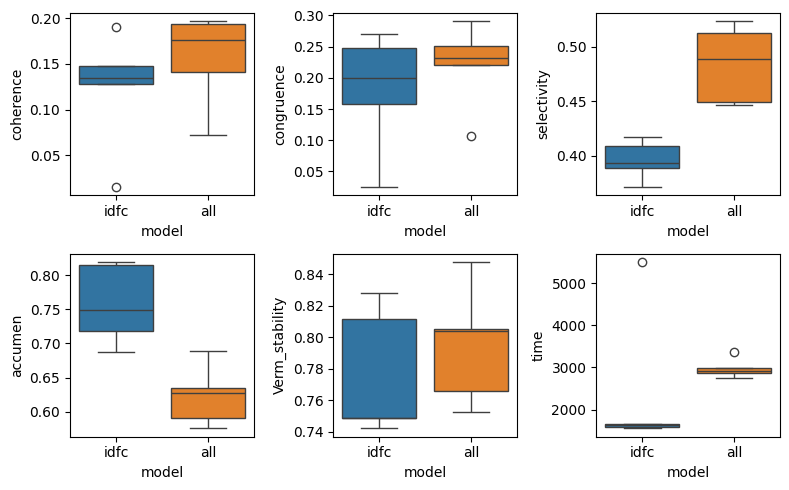

In [28]:
plt.figure(figsize=(8, 5))
kk=0
for col in df002.columns:
    if col not in ['Unnamed: 0', 'identity', 'separability', 'stability','completness',
       'fidelity', 'sparsity', 'instability', 'model']:
        kk = kk+1
        plt.subplot(2, 3, kk)
        sns.boxplot(data=df004, x="model", y=col, hue='model')
        plt.tight_layout()

<Axes: xlabel='model', ylabel='time'>

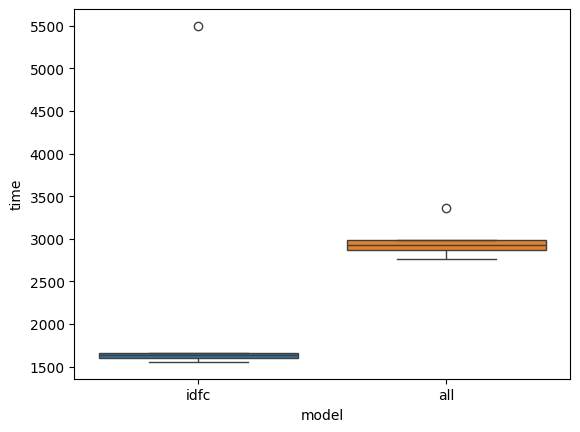

In [16]:
sns.boxplot(data=df004, x="model", y="time", hue='model')

<Axes: xlabel='model', ylabel='instability'>

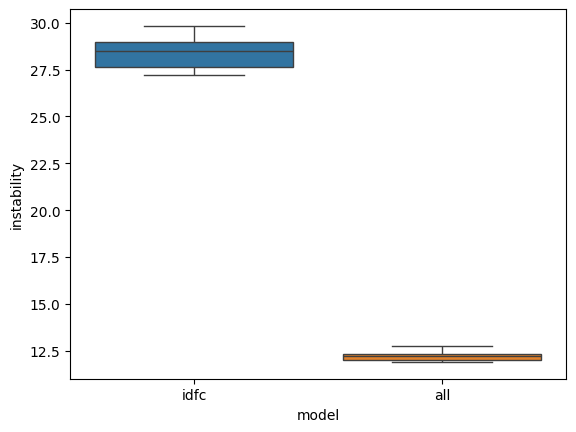

In [10]:
sns.boxplot(data=df003, x="model", y="instability", hue='model')